## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# read dataset
df = pd.read_csv('ab_data.csv')

# inspect dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# Calculate the number of rows in the dataset
num_rows = len(df)   
print("The number of rows in the dataset is: {}".format(num_rows))

The number of rows in the dataset is: 294478


c. The number of unique users in the dataset.

In [5]:
#Calculate the number of unique users in the dataset using nunique()
num_users = df.nunique()['user_id']
print("The number of unique users in the dataset is : {}".format(num_users))

The number of unique users in the dataset is : 290584


d. The proportion of users converted.

In [6]:
#Calculate the proportion of users converted by using mean()
prop_conv = df['converted'].mean()
output = round(prop_conv, 4)
print("The proportion of Converted users is {}%".format(output*100))

The proportion of Converted users is 11.97%


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#Number of treatment group users landing on old_page 
t_old = len(df.query("group == 'treatment' and landing_page == 'old_page'"))
print("Number of treatment group users landing on old_page is {}".format(t_old))

#Number of control group users landing on new_page
c_new = len(df.query("group == 'control' and landing_page == 'new_page'"))
print("Number of control group users landing on new_page is {}".format(c_new))

#Total number of times the new_page and treatment don't line up
print("Number of users landing on the wrong page is {}".format(t_old + c_new))

Number of treatment group users landing on old_page is 1965
Number of control group users landing on new_page is 1928
Number of users landing on the wrong page is 3893


f. Do any of the rows have missing values?

In [8]:
#Check for missing values
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Delete Rows
# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# drop rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
#Save new dataset with mismatched rows dropped
df.to_csv('ab_edited.csv', index=False)
df2 = pd.read_csv('ab_edited.csv')

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#Calculate the number of unique users in the dataset using nunique()
num_users2 = df2.nunique()['user_id']
print("The number of unique users in the dataset is : {}".format(num_users2))

The number of unique users in the dataset is : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#Find duplicated user
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
#Search row with the user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#Drop duplicated user_id
df2.drop(labels=1876, axis=0, inplace=True)

In [17]:
# Check result
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#Calculate the mean of 'converted' to get the probability of an individual converting 
conv_prob = df2['converted'].mean() * 100
output = round(conv_prob, 2)
print("The probability of an individual converting regardless of the page they receive is: {}%".format(output))

The probability of an individual converting regardless of the page they receive is: 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#Calculate the mean of the control group's 'converted' to get the probability of an individual converting 
conv_cont_prob = df2[df2['group']=='control']['converted'].mean() * 100
output = round(conv_cont_prob, 2)
print("The probability of the control group individual converting regardless of the page they receive is: {}%".format(output))

The probability of the control group individual converting regardless of the page they receive is: 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Calculate the mean of the treatment group's 'converted' to get the probability of an individual converting 
t_cont_prob = df2[df2['group']=='treatment']['converted'].mean() * 100
output = round(t_cont_prob, 2)
print("The probability of the treatment group individual converting regardless of the page they receive is: {}%".format(output))

The probability of the treatment group individual converting regardless of the page they receive is: 11.88%


d. What is the probability that an individual received the new page?

In [21]:
#The treatment group receives the new page
t_user = len(df2.query("group == 'treatment'"))

# Total number of users
users = df2.shape[0]

new_p = t_user/users
output = round(new_p,4) * 100
print("The probability that an individual receives the new page is: {}%".format(output))

The probability that an individual receives the new page is: 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Result**
- The probability of the treatment group converting is 11.88%, while that of the control group is 12.04%. 
- This shows that the old page is better but by a very thin margin.
- Other factors that can influence the result such as the test duration are not accounted for, so it is hard to say that the old page is superior to the new page with certainty. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis**

$H_{0}$ : $p_{old}$ >=  $p_{new}$

$H_{1}$ : $p_{old}$ <  $p_{new}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#Given the assumption in the question, p_(new) = p_(new), 
#we should calculate the average of the real p_(new) and p_(new).

#Probability of conversion for new page
p_new = df2[df2['landing_page']=='new_page']['converted'].mean() * 100
output1 = round(p_new, 2)
print("The convert rate for new page is: {}%".format(output1))

#Probability of conversion for old page
p_old = df2[df2['landing_page']=='old_page']['converted'].mean() * 100
output2 = round(p_old, 2)
print("The convert rate for old page is: {}%".format(output2))

#Probability of mean conversion
p_mean = df2['converted'].mean() * 100
output3 = round(p_mean, 2)
print("The convert rate under the null hypothesis is: {}%".format(output3))



The convert rate for new page is: 11.88%
The convert rate for old page is: 12.04%
The convert rate under the null hypothesis is: 11.96%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#Same as above
p_mean = df2['converted'].mean() * 100
output3 = round(p_mean, 2)
print("The convert rate under the null hypothesis is: {}%".format(output3))

The convert rate under the null hypothesis is: 11.96%


c. What is $n_{new}$?

In [24]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [25]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# Simulate conversion rates under null hypothesis
new_page_sim = (np.random.choice([1, 0], size=n_new, p=[p_mean/100, (1-p_mean/100)])).mean()
output1 = round(new_page_sim, 4) * 100
print(output1,'%')

11.93 %


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Simulate conversion rates under null hypothesis
old_page_sim = (np.random.choice([1, 0], size=n_old, p=[p_mean/100, (1-p_mean/100)])).mean()
output2 = round(old_page_sim, 4) * 100
print(output2,'%')

12.02 %


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
output3 = output1 - output2
print(output3,'%')

-0.09 %


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []

# Re-run simulation 10,000 times
for i in range(10000):
    new_page_sim = (np.random.choice([1, 0], size=n_new, p=[p_mean/100, (1-p_mean/100)])).mean()
    old_page_sim = (np.random.choice([1, 0], size=n_old, p=[p_mean/100, (1-p_mean/100)])).mean()
    p_diff = new_page_sim - old_page_sim
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

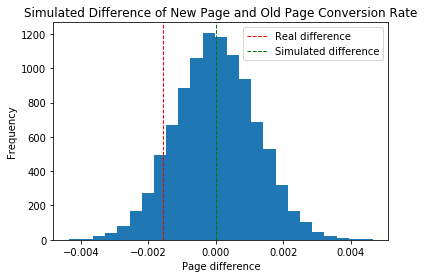

In [31]:
#Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Conversion Rate')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new/100-p_old/100), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

The simulated data creates a normal distribution as expected. The mean of this normal distribution is 0, which is what we got for the the null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
output = round(act_diff, 4)
output

-0.0016

In [33]:
p_diffs = np.array(p_diffs)

p_diffs

array([ 0.00094076,  0.00259284,  0.0011749 , ...,  0.00257186,
       -0.00042185, -0.00136504])

In [34]:
output2 = (act_diff < p_diffs).mean()
print('Proportion of greater than actual difference: {}%'.format(output2*100))


Proportion of greater than actual difference: 90.64999999999999%


This makes sense considering the actual difference is a negative number while the mean is 0. 

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

- There is no conversion advantage for the new page and we can conclude that the null hypothesis is true. The p-value (probability of observing our statistic) is very high and around 90% of the time we see the difference greater than the actual difference. 
- If our sample conformed to the null hypothesis, we'd expect the proportion greater than the actual difference to be around 0.5. 
- Since our p-value is greater than the p-critical of 0.05, we can say that we cannot reject the null hypothesis. 
- We can conclude that the null hypothesis is true as old and new pages perform almost similary and in some cases, the old page is better. 


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
#Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)


1.31092419842 0.905058312759


In [37]:
from scipy.stats import norm

#95% confidence level: 
print(norm.ppf(1-(0.05)))

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**
- The z-score is 1.31, which is less than the critical value at 95% confidence interval of 1.644. 
- This is not enough for us to reject the null hypothesis.
- Our results align with the findings of part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df['intercept']=1
df[['control', 'ab_page']] = pd.get_dummies(df['group'])
df = df.drop(['control'], axis=1)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:               8.085e-06
Time:                        19:30:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**
- The p-value associated with ab_page is 0.19
- The p-values are different in Part 2 and 3 due to the different approach of calculation. 
- In Part 3, the p-value associated with the alternative hypothesis is the P>|z| value of the ab_page in the model. This tests whether the parameter of the slope (or intercept) is equal to the null hypothesis and suggests whether the changes in the explanatory variables are related to the changes in the response value (conversion rate). 
- The p-value we got is too high to reject the null hypothesis, which means that the explanatory variables are not significantly associated with the changes in the response value.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
- We should consider other factors into the regression model that may influence the outcome of conversion. Factors such as whether a candidate is new or returning, or the seasonality can change the outcomes. 
- It would be hard to determine which factors are the most influential if there are too many involved with the regression model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [50]:
df_new['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
##Create the dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:               2.324e-05
Time:                        19:32:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
==============================================================================
"""

In [55]:
df_new['CA_ind_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['US_ind_ab_page'] = df_new['US']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,CA_ind_ab_page,US_ind_ab_page
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,0,1


In [56]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA', 'US','CA_ind_ab_page','US_ind_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:               3.483e-05
Time:                        21:18:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page            0.0108      0.023      0.475      0.635      -0.034       0.056
CA                -0.0118      0.040     -0.296      0.767      -0.090       0.066
US                 0.0057      0.019      0.306      0.760      -0.031       0.043
CA_ind_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_ind_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==================================================================================
"""

In [57]:
np.exp(results.params)

intercept         0.136392
ab_page           1.010893
CA                0.988285
US                1.005761
CA_ind_ab_page    0.924703
US_ind_ab_page    0.969079
dtype: float64

In [58]:
df.groupby('group').mean()['converted']



group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

**Answers:**
- This logistic model also shows that there is no substantial difference between the conversion rates between the control and treatment groups.
- The chances of recieving either the new or old page were similar so we can say the test conditions were fairly good as well.
- The p-value of the ab_page variable has actually increased a little after adding the country variables. 
- The country of the user doesn't seem to be an influential factor as well considering the coefficients are similar. 
- This indicates that we can accept the Null Hypothesis and keep the original page as is.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.